In [1]:
# Dependencies
!pip install roboflow
!pip install python-dotenv
!pip install ultralytics
from roboflow import Roboflow
from google.colab import userdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.2 MB/s eta 0:00:00
   ━━

In [2]:
# Check GPU Access
!nvidia-smi

Sat Jul 12 13:22:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import the dataset
from roboflow import Roboflow
from google.colab import userdata

api = Roboflow(api_key=userdata.get("ROBOFLOW_DATASET_API"))
project = api.workspace("traintrackproject").project("traintracks")
version = project.version(4)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traintracks-4 in yolov8:: 100%|██████████| 4308/4308 [00:00<00:00, 4385.93it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Move the dataset to the directory YOLOv8 expects it in.
# Using this instead of the persistant settings.json because the latter doesn't persist in Google Colab.

import os
import shutil

source_path = './Traintracks-4'
destination_path = '/content/datasets/Traintracks-4'
datasets_dir = '/content/datasets'
data_yaml_loc = '/content/datasets/Traintracks-4/data.yaml'

if not os.path.exists(datasets_dir):
    os.makedirs(datasets_dir)
    print(f"Created directory: {datasets_dir}")

# Move the dataset directory
if os.path.exists(source_path):
    if os.path.exists(destination_path):
        print(f"Destination directory already exists")
    else:
        shutil.move(source_path, datasets_dir)
        print(f"Moved dataset from {source_path} to {datasets_dir}")

Created directory: /content/datasets
Moved dataset from ./Traintracks-4 to /content/datasets


In [5]:
# Import and Validate Model: YOLOv8s
import os
os.chdir('/content') # Change directory back to content

from ultralytics.models.yolo.model import YOLO

model = YOLO('yolov8m.pt')
model.val(data=data_yaml_loc, save_json=True)

100%|██████████| 49.7M/49.7M [00:00<00:00, 318MB/s]


Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m summary (fused): 92 layers, 25,886,080 parameters, 0 gradients, 78.9 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 19.7MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2446.6±422.0 MB/s, size: 86.3 KB)



val: Scanning /content/datasets/Traintracks-4/valid/labels... 402 images, 0 backgrounds, 0 corrupt: 100%|██████████| 402/402 [00:00<00:00, 1757.27it/s]

val: New cache created: /content/datasets/Traintracks-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1000, len(boxes) = 1042. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.18it/s]


                   all        402       1042     0.0658     0.0338     0.0205     0.0101
                person        298        395      0.132     0.0675     0.0269     0.0115
               bicycle        402        647          0          0     0.0141    0.00865
Speed: 1.3ms preprocess, 20.0ms inference, 0.0ms loss, 2.0ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a14e5fcfc10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [6]:
# Train the model
# Values are recommended as per YOLOv8m
results = model.train(
  data=data_yaml_loc,
  epochs=30,
  batch=16,
  imgsz=640,
  scale=0.9,
  mosaic=1.0,
  mixup=0.15,
  copy_paste=0.4,
  device="0",
)

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.4, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Traintracks-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0,

100%|██████████| 5.35M/5.35M [00:00<00:00, 100MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2556.4±893.3 MB/s, size: 118.4 KB)


train: Scanning /content/datasets/Traintracks-4/train/labels... 1544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1544/1544 [00:00<00:00, 2109.41it/s]

train: New cache created: /content/datasets/Traintracks-4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2627, len(boxes) = 2986. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 674.6±324.7 MB/s, size: 91.9 KB)


val: Scanning /content/datasets/Traintracks-4/valid/labels.cache... 402 images, 0 backgrounds, 0 corrupt: 100%|██████████| 402/402 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1000, len(boxes) = 1042. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      6.01G      1.854      2.187      2.136         42        640: 100%|██████████| 97/97 [00:51<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        402       1042      0.714      0.213       0.19      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.55G      1.237      1.508      1.698         32        640: 100%|██████████| 97/97 [00:49<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]

                   all        402       1042      0.822      0.253      0.271      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      6.62G      1.185      1.412      1.622         33        640: 100%|██████████| 97/97 [00:51<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]

                   all        402       1042      0.796      0.209        0.2      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      6.62G      1.129      1.364       1.56         42        640: 100%|██████████| 97/97 [00:50<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.33it/s]

                   all        402       1042       0.83      0.245      0.267      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.69G      1.061      1.305      1.512         84        640: 100%|██████████| 97/97 [00:50<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]

                   all        402       1042      0.847      0.232      0.266      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.75G      1.056      1.283      1.509         35        640: 100%|██████████| 97/97 [00:50<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]

                   all        402       1042      0.768      0.219      0.217      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.75G      1.005      1.233      1.479         29        640: 100%|██████████| 97/97 [00:50<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]

                   all        402       1042      0.309       0.23      0.233      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.75G     0.9526      1.193      1.439         24        640: 100%|██████████| 97/97 [00:50<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]

                   all        402       1042      0.402       0.27      0.299       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.75G     0.9271      1.143      1.418         35        640: 100%|██████████| 97/97 [00:51<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        402       1042      0.875      0.216      0.262      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      6.75G     0.9033      1.132      1.394         53        640: 100%|██████████| 97/97 [00:50<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.31it/s]

                   all        402       1042      0.272      0.277      0.254      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.75G     0.9041      1.137      1.393         32        640: 100%|██████████| 97/97 [00:50<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]

                   all        402       1042      0.326      0.251      0.235      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      6.75G      0.864      1.058      1.358         45        640: 100%|██████████| 97/97 [00:51<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]

                   all        402       1042      0.349      0.288      0.317      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      6.75G     0.8287      1.064      1.362         43        640: 100%|██████████| 97/97 [00:51<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.14it/s]

                   all        402       1042      0.406      0.292       0.31      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      6.75G     0.8734      1.066       1.37         50        640: 100%|██████████| 97/97 [00:51<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]

                   all        402       1042      0.454      0.277      0.307      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.75G     0.8321      1.065      1.347         26        640: 100%|██████████| 97/97 [00:51<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]

                   all        402       1042      0.419      0.291      0.282      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       7.3G      0.814      1.023      1.332         34        640: 100%|██████████| 97/97 [00:51<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.26it/s]

                   all        402       1042      0.376      0.301      0.315      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.37G     0.8252      1.027      1.329         37        640: 100%|██████████| 97/97 [00:50<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]

                   all        402       1042      0.387      0.295      0.307       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.37G     0.8057      1.016      1.326         41        640: 100%|██████████| 97/97 [00:50<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]

                   all        402       1042      0.371      0.293      0.303      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.37G     0.8098      1.015      1.326         41        640: 100%|██████████| 97/97 [00:50<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]

                   all        402       1042      0.444      0.294      0.316      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.37G     0.7743     0.9549      1.296         36        640: 100%|██████████| 97/97 [00:51<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]

                   all        402       1042       0.43      0.272      0.303      0.232


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.37G     0.7944      1.049      1.405         15        640: 100%|██████████| 97/97 [00:51<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.33it/s]

                   all        402       1042      0.457      0.288      0.337      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.37G     0.7743     0.9597       1.38         12        640: 100%|██████████| 97/97 [00:50<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.15it/s]

                   all        402       1042      0.456      0.309      0.327      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.37G     0.7634     0.9466      1.373         15        640: 100%|██████████| 97/97 [00:50<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.31it/s]

                   all        402       1042      0.431      0.303      0.312      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      7.37G     0.7437     0.9173      1.357         14        640: 100%|██████████| 97/97 [00:50<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]

                   all        402       1042      0.401      0.306      0.319      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.37G     0.7385     0.9249       1.36         41        640: 100%|██████████| 97/97 [00:50<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]

                   all        402       1042      0.414      0.337      0.344      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.37G     0.7017     0.8669      1.332         14        640: 100%|██████████| 97/97 [00:50<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]

                   all        402       1042      0.404      0.345      0.335      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.37G     0.7052     0.8432      1.314         12        640: 100%|██████████| 97/97 [00:50<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.21it/s]

                   all        402       1042       0.43      0.335      0.343      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      7.37G     0.6779     0.8247      1.298         17        640: 100%|██████████| 97/97 [00:50<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]

                   all        402       1042      0.427      0.338      0.344       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.37G     0.6753     0.8232      1.298         15        640: 100%|██████████| 97/97 [00:50<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]

                   all        402       1042       0.42      0.358      0.346      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.37G      0.666     0.8096       1.29         11        640: 100%|██████████| 97/97 [00:50<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]

                   all        402       1042      0.442       0.35      0.353      0.275



30 epochs completed in 0.490 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]


                   all        402       1042      0.442       0.35      0.354      0.275
                danger        298        395      0.189      0.111     0.0432     0.0173
                  rail        402        647      0.694      0.589      0.664      0.533
Speed: 0.2ms preprocess, 9.9ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


In [7]:
# Evaluate model performance on the validation set
metrics = model.val(data=data_yaml_loc)

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2561.3±1013.0 MB/s, size: 117.1 KB)


val: Scanning /content/datasets/Traintracks-4/valid/labels.cache... 402 images, 0 backgrounds, 0 corrupt: 100%|██████████| 402/402 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1000, len(boxes) = 1042. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]


                   all        402       1042      0.443      0.346      0.353      0.275
                danger        298        395      0.187      0.106     0.0432     0.0174
                  rail        402        647      0.698      0.586      0.663      0.532
Speed: 0.7ms preprocess, 22.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train2



image 1/202 /content/datasets/Traintracks-4/test/images/464-1-_png_jpg.rf.55df2a6fd19fe8c41c4769fe4aca0f96.jpg: 640x640 1 rail, 21.0ms
image 2/202 /content/datasets/Traintracks-4/test/images/IMG_8674_JPG_jpg.rf.8bedc1f65834f1cf0af88001e6398b92.jpg: 640x640 1 rail, 21.0ms
image 3/202 /content/datasets/Traintracks-4/test/images/IMG_8675_JPG_jpg.rf.765ea0b5e9b2543c6b58c67babc70854.jpg: 640x640 1 danger, 1 rail, 21.0ms
image 4/202 /content/datasets/Traintracks-4/test/images/T011000_jpg.rf.b3db824e06646fa6d6a81f64dbfbfaf4.jpg: 640x640 1 rail, 21.0ms
image 5/202 /content/datasets/Traintracks-4/test/images/T011001_jpg.rf.52c6a23be4734251e682c7037b0d8539.jpg: 640x640 1 rail, 21.0ms
image 6/202 /content/datasets/Traintracks-4/test/images/T011002_jpg.rf.3600534ff9e2e9f68e7abdc494eb975b.jpg: 640x640 2 dangers, 21.0ms
image 7/202 /content/datasets/Traintracks-4/test/images/T011003_jpg.rf.1da80d66049d138c4bb7db345ed02087.jpg: 640x640 4 dangers, 1 rail, 21.0ms
image 8/202 /content/datasets/Traintra

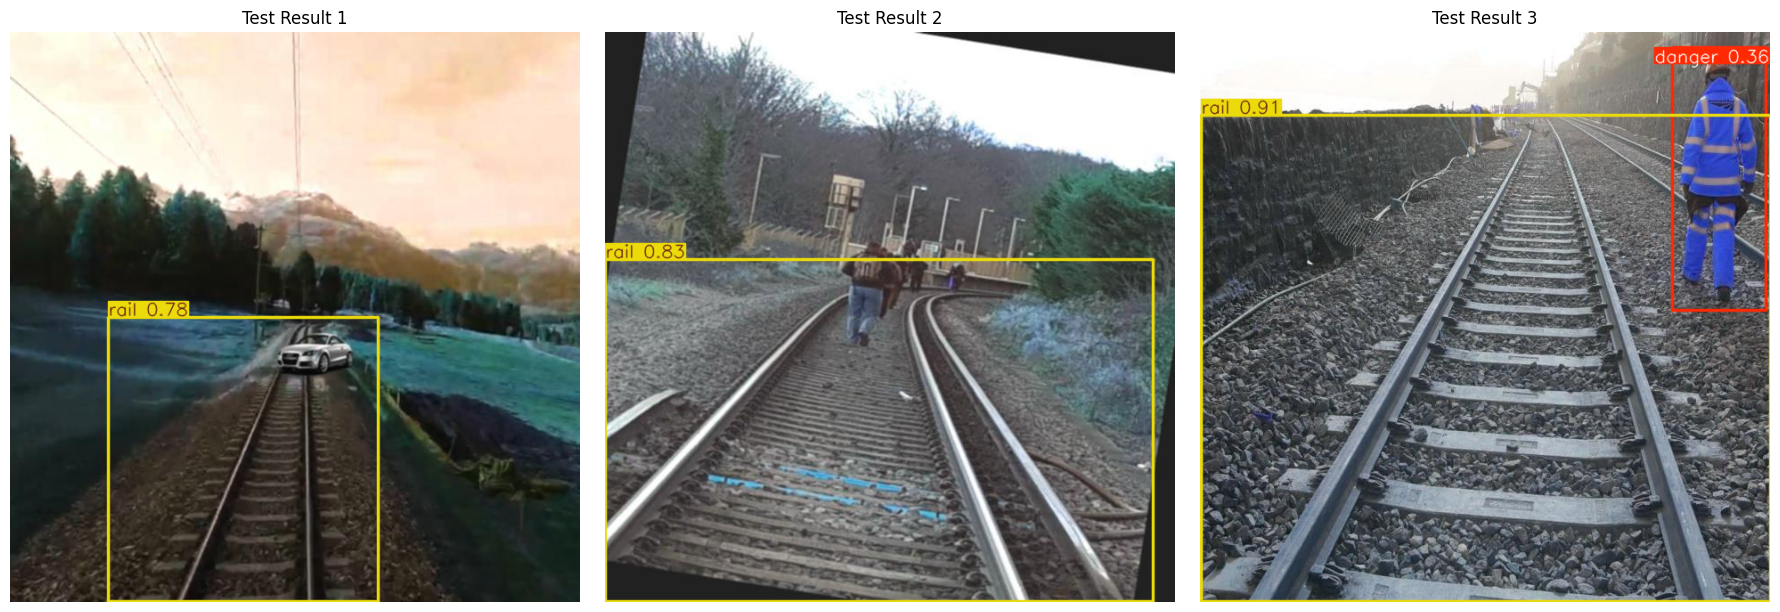

In [12]:
# Test Model
results = model('/content/datasets/Traintracks-4/test/images', batch=16, save=True)

# Display only the first 3 images
import matplotlib.pyplot as plt

subset = results[:3]

# Create a row of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

for i, result in enumerate(subset):
    # result.plot() returns a numpy array (the image with detections)
    img = result.plot()
    axes[i].imshow(img)
    axes[i].set_title(f"Test Result {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# EXTRA: Download the results

import shutil
from google.colab import files

shutil.make_archive('/content/runs_detect', 'zip', '/content/runs/detect')

files.download('/content/runs_detect.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>